In [19]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

import windIO
import wind
import windCAD

## Building Geometry

In [20]:
caseDir = r"D:\tempData_depot\simData_CandC\wt_tngE2/"

tapFile = caseDir+"tngTapDefinition.csv"
data = pd.read_csv(tapFile)

faceID = [1,2,3,4,5,6]
name = ['Roof_1','Roof_2','Wall_1','Wall_2','Wall_3','Wall_4']
note = ['','','','','','']
origin = [[0,0,0.08],
          [0,-0.0915,0.07809375],
          [-0.1372,0,0],
          [0,-0.0915,0],
          [0.1372,0,0],
          [0,0.0915,0],]
basisVectors = [[[1,0,0],[0,0.999783057,0.020828814],[0,-0.020828814,0.999783057]],
                [[1,0,0],[0,0.999783057,-0.020828814],[0,0.020828814,0.999783057]],
                [[0,0,-1],[-1,0,0],[0,1,0]],
                [[1,0,0],[0,0,-1],[0,1,0]],
                [[0,0,1],[1,0,0],[0,1,0]],
                [[-1,0,0],[0,0,1],[0,1,0]],]
# origin_plt = [[0, 0],
#                 [0, -0.091519855],
#                 [0, -0.2332],
#                 [0, -0.18559375],
#                 [0, -0.2332],
#                 [0, -0.18559375],]
origin_plt = [[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              ]
# basisVectors_plt = [[[0, -1], [1, 0]],
#                     [[0, -1],[1, 0]],
#                     [[1, 0], [0, 1]],
#                     [[0, -1], [1, 0]],
#                     [[-1, 0], [0, -1]],
#                     [[0, 1], [-1, 0]],]
# basisVectors_plt = [[[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     ]
basisVectors_plt = [[[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    ]
vertices = [[[-0.091519855,-0.1372],[0,-0.1372],[0,0.1372],[-0.091519855,0.1372],[-0.091519855,-0.1372]],
            [[0,-0.1372],[0.091519855,-0.1372],[0.091519855,0.1372],[0,0.1372],[0,-0.1372]],
            [[-0.0915,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0,-0.1532],[-0.0915,-0.15510625],[-0.0915,-0.2332]],
            [[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,-0.1372]],
            [[-0.0915,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0,0.1532],[-0.0915,0.15510625],[-0.0915,0.2332]],
            [[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,-0.1372]],]

H = 0.08
B = 0.2744
D = 0.183

In [21]:

faces = []
for i,f in enumerate(faceID):
    idx = data.index[data.faceID == f]
    tapCoords = np.transpose(np.array([data.x[idx], data.y[idx]]))
    tapNos = np.array(data.tapNo[idx],dtype=int)
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=tapCoords,
                zoneDict={},
                # nominalPanelAreas=[1.0e-4, 2.45e-4, 4.8e-4, 7.8e-4, 1e-3], #[5e-5, 8e-5, 1.5e-4, 5e-4],
                nominalPanelAreas=[4.8e-4, 7.8e-4, 1e-3],
                numOfNominalPanelAreas=5,
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces.append(fc)

# file = caseDir+'ttu_bldgGeom.json'
# allFaces.writeToFile(file_basic=file)

Generating panels ...
	Working on: Default-Default
		Working on nominal area: 0.00048
zoneBoundary: [[-0.09151985 -0.1372    ]
 [ 0.         -0.1372    ]
 [ 0.          0.1372    ]
 [-0.09151985  0.1372    ]
 [-0.09151985 -0.1372    ]], area: 0.00048
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 4, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 4, 	Error in wights: -4.440892098500626e-16
				No. of taps in panel: 4, 	Error in wights: -4.440892098500626e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 3, 	Error in wights: 0.0
				No. of taps in panel: 3, 	Error in

d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:418: UserWarning: The difference between Zone area and the sum of its panel areas exceeds the tolerance level.
  warnings.warn(f"The difference between Zone area and the sum of its panel areas exceeds the tolerance level.")


				No. of taps in panel: 4, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 6, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 6, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 7, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 7, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 22, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 22, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 9, 	Error in wights: 0.0
				No. of taps in panel: 9, 	Error in wights: 0.0
				No. of taps in panel: 10, 	Error in wights: 0.0
				No. of

In [22]:
ttu = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=0.02,
                caseName='TNG-E2R1',
                )

(-0.25651999999999997,
 0.25651999999999997,
 -0.20417496549999997,
 0.20417496549999997)

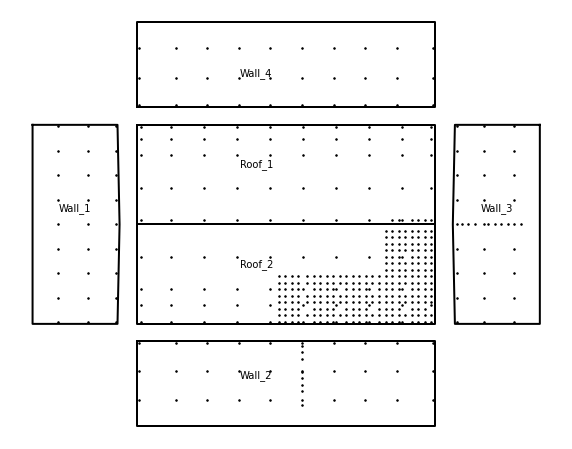

In [61]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot()

ttu.plotEdges(ax=ax)
ttu.plotTaps(ax=ax)

ax.axis('equal')
ax.axis('off')

## Wind field

In [24]:
dt = 3.7890e-04

file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_profile.csv'
temp = pd.read_csv(file)

file = caseDir+'tngE2Fr1_TH-UofT.npy'
U_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-VofT.npy'
V_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-WofT.npy'
W_TH = np.load(file)


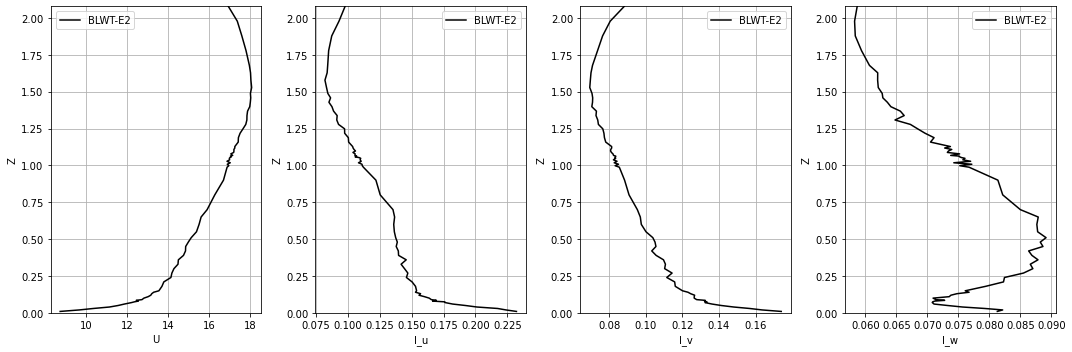

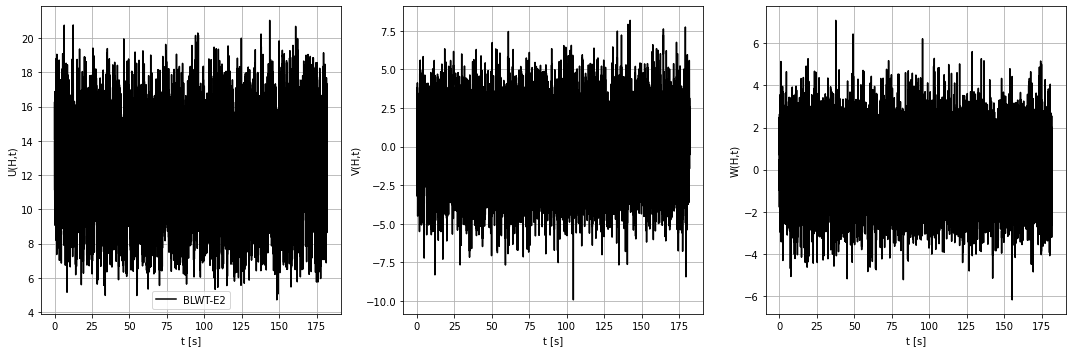

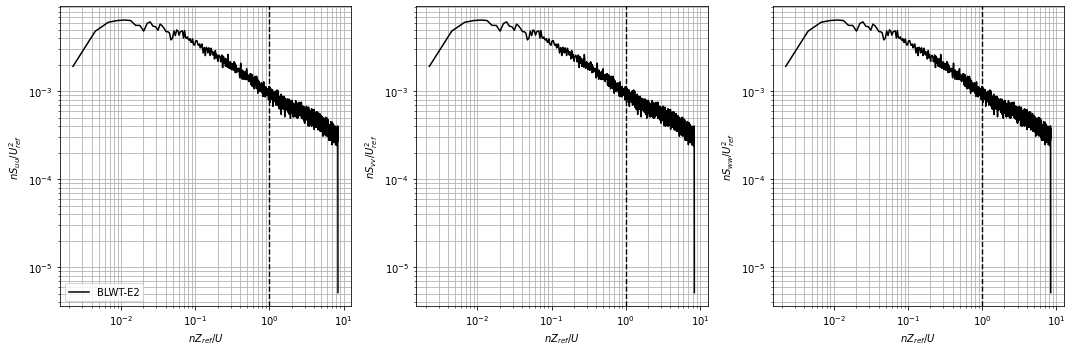

In [25]:

vel = wind.profile(name="BLWT-E2", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=64)
vel.plot()

## $C_p$ data

In [26]:
mainRefPitotChnlIdx = 2
fps2mps = 0.3048
Zpitot = 1.48
Ntaps = 456

dataDirHFPI = r'E:\TNG\rawHFPI\tngE2p1/'

N_AoA = 3
# AoAids = [str(i).zfill(3) for i in range(1,N_AoA+1)]
AoAids = ['001', '010', '019']

        # self.AoA:List[float] = AoA          # [N_AoA]
        # self.CpOfT = CpOfT      # [N_AoA,Ntaps,Ntime]
        # self.pOfT = pOfT        # [N_AoA,Ntaps,Ntime]
        # self.p0ofT = p0ofT      # [N_AoA,Ntime]
        # self.CpStats = CpStats          # dict{[N_AoA,Ntaps] * nFlds}
AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for i,a in enumerate(AoAids):
    file_pssd = dataDirHFPI+'TNGp1E02R001P'+ AoAids[i] +'a.pssd'
    file_pssr = dataDirHFPI+'TNGp1E02R001P'+ AoAids[i] +'a.pssr'

    cp_data,analog,WTTDATALOG = wio.readPSSfile(file_pssr,file_pssd)

    if i == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[i,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[i,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[i] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[i] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)



In [27]:
ttu = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=0.02,
                caseName='TNG-E2R1',
                refProfile=vel,
                Zref_input=Zpitot,  # for the Cp TH being input below
                Uref_input=Upitot,  # for the Cp TH being input below
                samplingFreq=sampleRate[0],
                airDensity=1.125,
                AoA=AoA,
                CpOfT=CpTH,  # Cp TH referenced to Uref at Zref
                badTaps=None, # tap numbers to remove
                reReferenceCpToH=True, # whether or not to re-reference Cp building height
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod='minmax',
                )


In [ ]:
x = ttu.plotField(fieldName='mean',dxnIdx=2,figSize=[15,10],fldRange=[-1.4,0.7])

In [114]:
d = 1
f = 3
a = 0
nPnlsA = ttu.NumPanelsPerArea
nPnls = ttu.NumPanels
z = 0
fld = ttu.CpStats_areaAvg[z]['mean'][d,:]
fc = ttu[f]
nP = fc.NumPanelsPerArea

s = []
e = []

for j in range(f+1):
    sOld = s
    if j > 0:
        s = e + ttu[j-1].NumPanelsPerArea[a]
    e = sOld + ttu[j].NumPanelsPerArea[a]
    print(f"NumPan_j = {ttu[j].NumPanelsPerArea[a]}, NumPan_j-1 = {ttu[j-1].NumPanelsPerArea[a]}, s = {s}, e = {e}")





# fig = plt.figure()
# ax = fig.add_subplot()
# fc.plotEdges(ax=ax)
# for p,pnl in enumerate(zip(fc.panels[a][z], fld[s:e])):
#     # print(pnl)
#     pass


# fc.plotTaps(ax=ax)
# # fc.plotPanels(ax=ax, aIdx=a)
# ax.axis('equal')

print(nPnlsA)
print(nP)
print(np.shape(fc.panels[0][0]))
print(np.shape(fld[s:e]))

NumPan_j = 72, NumPan_j-1 = 72, s = 0, e = 72
NumPan_j = 72, NumPan_j-1 = 72, s = 144, e = 72
NumPan_j = 42, NumPan_j-1 = 72, s = 144, e = 186
NumPan_j = 72, NumPan_j-1 = 42, s = 228, e = 216
[372 192 136]
[72 36 16]
(72,)
(0,)


(0.5, 0.0, 0.0, 1.0)
